In [1]:
#1 Load the dataset using Pandas and display the first 5 rows.
import pandas as pd 
df=pd.read_csv('ott_user.csv')
print(df.head(5))

  user_id  age  gender       city  device        genre  watch_hours_per_week  \
0    U001   18    Male      Delhi  Mobile       Action                    16   
1    U002   22  Female     Mumbai      TV        Drama                     9   
2    U003   25    Male       Pune  Laptop       Comedy                    12   
3    U004   30  Female  Bangalore      TV  Documentary                     5   
4    U005   19    Male      Delhi  Mobile       Action                    18   

   rating_given subscription_type  subscription_months  
0             5           Premium                   14  
1             4          Standard                    8  
2             5           Premium                   16  
3             3             Basic                    6  
4             5           Premium                   18  


In [11]:
#2 Find basic information about the dataset (rows, columns, data types).
print(df.shape)
print("information about the dataset:", df.info())

(30, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               30 non-null     object
 1   age                   30 non-null     int64 
 2   gender                30 non-null     object
 3   city                  30 non-null     object
 4   device                30 non-null     object
 5   genre                 30 non-null     object
 6   watch_hours_per_week  30 non-null     int64 
 7   rating_given          30 non-null     int64 
 8   subscription_type     30 non-null     object
 9   subscription_months   30 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 2.5+ KB
information about the dataset: None


In [3]:
#3 Calculate average watch hours per week for each genre.
df.groupby('genre')['watch_hours_per_week'].mean()

genre
Action         13.500000
Comedy         14.111111
Documentary     4.600000
Drama           9.375000
Name: watch_hours_per_week, dtype: float64

In [3]:
#4 Identify which genre is most popular among users aged below 25.
below_25=df[df['age']<25]
counts=below_25['genre'].value_counts()
print(counts)


genre
Comedy    6
Action    4
Drama     3
Name: count, dtype: int64


In [4]:
#5 Find the average watch hours for each subscription type.
df.groupby('subscription_type')["watch_hours_per_week"].mean()

subscription_type
Basic        5.250000
Premium     15.846154
Standard     9.444444
Name: watch_hours_per_week, dtype: float64

In [3]:
#6 Using NumPy, calculate mean and standard deviation of watch_hours_per_week.
import numpy as np
mean_watch_hours=np.mean(df['watch_hours_per_week'])
std_watch_hours=np.std(df['watch_hours_per_week'])
print("mean watch hours per week:", mean_watch_hours)
print("standard deviation of watch hours per week:", std_watch_hours)
 

mean watch hours per week: 11.1
standard deviation of watch hours per week: 4.714163057567412


In [6]:
#7 Identify top 10% binge watchers
hours_list=df['watch_hours_per_week']
cutoff = np.percentile(hours_list, 90)
binge_watchers = df[df['watch_hours_per_week'] >= cutoff]
print(cutoff)
print(binge_watchers)


17.1
   user_id  age  gender   city  device   genre  watch_hours_per_week  \
4     U005   19    Male  Delhi  Mobile  Action                    18   
16    U017   21    Male  Delhi  Mobile  Action                    19   
23    U024   19  Female   Pune  Mobile  Comedy                    18   

    rating_given subscription_type  subscription_months  
4              5           Premium                   18  
16             5           Premium                   20  
23             5           Premium                   18  


In [7]:
#8 Analyze customer ratings across different genres.
df.groupby('genre')['rating_given'].mean()

genre
Action         4.500000
Comedy         4.777778
Documentary    2.800000
Drama          3.875000
Name: rating_given, dtype: float64

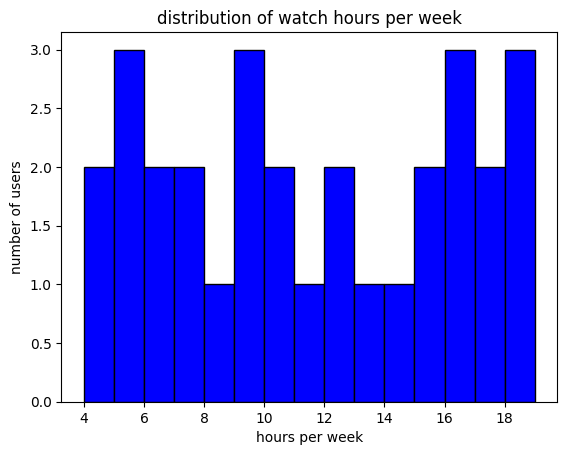

In [4]:
#9 Plot a histogram to show the distribution of watch hours.
import matplotlib.pyplot as plt
plt.hist(df['watch_hours_per_week'],bins=15,color="blue",edgecolor='black')
plt.title('distribution of watch hours per week')
plt.xlabel('hours per week')
plt.ylabel('number of users')
plt.show()

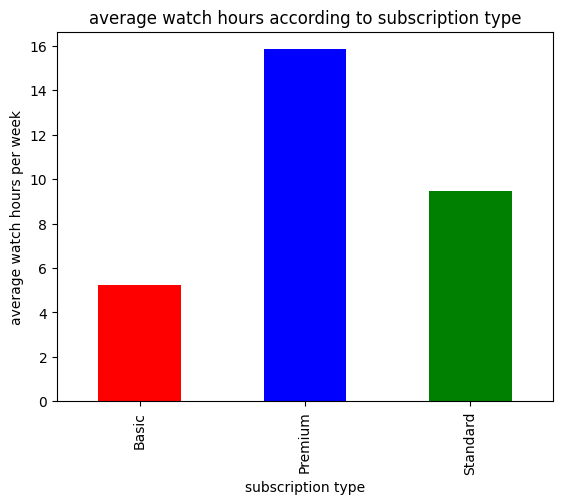

In [13]:
#10 Create a bar chart showing average watch hours by subscription type.
watch_hours=df.groupby('subscription_type')["watch_hours_per_week"].mean()
watch_hours.plot(kind="bar",color=['red','blue','green'])
plt.title('average watch hours according to subscription type')
plt.xlabel('subscription type')
plt.ylabel('average watch hours per week')
plt.show()

In [7]:
#11 Analyze which device type is used most by Premium users.
premium_df = df[df['subscription_type'] == 'Premium']
top_premium_device = premium_df['device'].value_counts().idxmax()
print(top_premium_device)


Mobile


In [8]:
#12 Find the relationship between subscription months and watch hours.
correlation = df['subscription_months'].corr(df['watch_hours_per_week'])
print(correlation)

0.9599746351515859


In [13]:
#13 Detect users who may cancel subscription due to low watch hours.
churn_risk = df[df['watch_hours_per_week'] < 6]
print(churn_risk)

   user_id  age  gender       city device        genre  watch_hours_per_week  \
3     U004   30  Female  Bangalore     TV  Documentary                     5   
10    U011   32    Male     Mumbai     TV  Documentary                     4   
15    U016   34  Female  Bangalore     TV  Documentary                     5   
20    U021   36    Male    Kolkata     TV  Documentary                     4   
27    U028   35  Female  Bangalore     TV  Documentary                     5   

    rating_given subscription_type  subscription_months  
3              3             Basic                    6  
10             3             Basic                    4  
15             3             Basic                    6  
20             2             Basic                    3  
27             3             Basic                    6  


In [15]:
#14 Give 5 business insights based on your analysis.
print("1. Comedy is the most engaging genre for young viewers and has the highest ratings.")
print("2. Premium subscribers watch nearly 3x more content than Basic users.")
print("3. Mobile is the preferred device for high-paying Premium members.")
print("4. There is a strong 0.96 correlation between how long users stay and how much they watch.")
print("5. Documentaries are underperforming in both watch time and user satisfaction.")

1. Comedy is the most engaging genre for young viewers and has the highest ratings.
2. Premium subscribers watch nearly 3x more content than Basic users.
3. Mobile is the preferred device for high-paying Premium members.
4. There is a strong 0.96 correlation between how long users stay and how much they watch.
5. Documentaries are underperforming in both watch time and user satisfaction.


In [16]:
#15 As a Data Scientist, suggest content and subscription strategy to the company.
print("- Increase investment in Comedy/Action to retain younger audiences.")
print("- Optimize the Mobile experience to satisfy the Premium user base.")
print("- Launch re-engagement campaigns for 'Low Watch Hour' users to prevent churn.")
print("- Bundle Documentary content with popular genres to increase its visibility.")


- Increase investment in Comedy/Action to retain younger audiences.
- Optimize the Mobile experience to satisfy the Premium user base.
- Launch re-engagement campaigns for 'Low Watch Hour' users to prevent churn.
- Bundle Documentary content with popular genres to increase its visibility.
